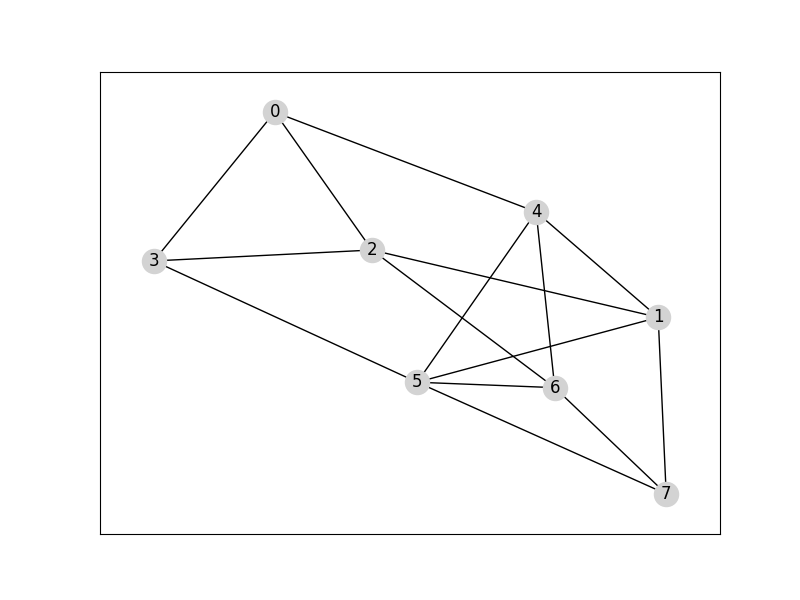

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation
import random

# Crear grafo con 8 nodos conectados entre sí (red P2P)
G = nx.generators.random_graphs.erdos_renyi_graph(n=8, p=0.4, seed=42)
pos = nx.spring_layout(G, seed=42)

# Simulación de propagación tipo IPFS
content_origin = 0
has_content = {n: False for n in G.nodes}
has_content[content_origin] = True
propagation_queue = [content_origin]
propagation_steps = []

# Precomputar pasos de propagación
while propagation_queue:
    current = propagation_queue.pop(0)
    neighbors = list(G.neighbors(current))
    random.shuffle(neighbors)
    for neighbor in neighbors:
        if not has_content[neighbor]:
            has_content[neighbor] = True
            propagation_queue.append(neighbor)
            propagation_steps.append((current, neighbor))

# Resetear estado
for n in has_content:
    has_content[n] = (n == content_origin)

fig, ax = plt.subplots(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

transfers = []

# Animación

def update(frame):
    ax.clear()
    nx.draw_networkx_nodes(G, pos, node_color=["green" if has_content[n] else "lightgray" for n in G.nodes], ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
    if frame < len(propagation_steps):
        src, dst = propagation_steps[frame]
        has_content[dst] = True
        transfers.append((src, dst))
    for src, dst in transfers:
        x = [pos[src][0], pos[dst][0]]
        y = [pos[src][1], pos[dst][1]]
        ax.plot(x, y, color='blue', linewidth=2, alpha=0.6)
    ax.set_title("Propagación de contenido estilo IPFS")
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=len(propagation_steps)+5, interval=1000, repeat=False)
plt.show()
